In [1]:
import os
import numpy as np # linear algebra
import pandas as pd
import nltk

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import json
import joblib
import os
import yaml
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [4]:
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kingl\AppData\Roaming\nltk_data...
[

True

In [3]:
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [4]:
import sklearn

sklearn.__version__

'1.3.2'

In [7]:
dath_path=r"C:\Users\kingl\OneDrive\Desktop\mlops_project\yt_sentiment\archive (1)\twitter_Data.csv"

df=pd.read_csv(dath_path)
df.shape


(162980, 2)

In [8]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [23]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
df.rename({"clean_text":'Comment',"category":'sentiments'},axis=1,inplace=True)

In [30]:
df.head()

,Comment,sentiments
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [10]:
(df.loc[df['sentiments'].isna()])

,Comment,sentiments
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [11]:
df=df.dropna()
df.shape

(162969, 2)

In [12]:
df.isnull().sum()

Comment       0
sentiments    0
dtype: int64

In [13]:
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [Comment, sentiments]
Index: []


<Axes: xlabel='sentiments'>

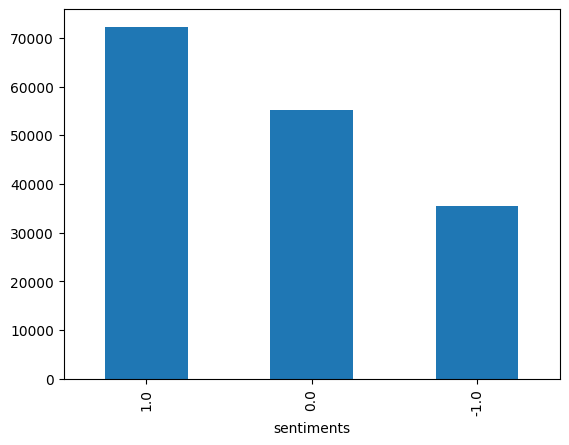

In [14]:
(df['sentiments']
 .value_counts()
 .plot(kind='bar'))

sentiments
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


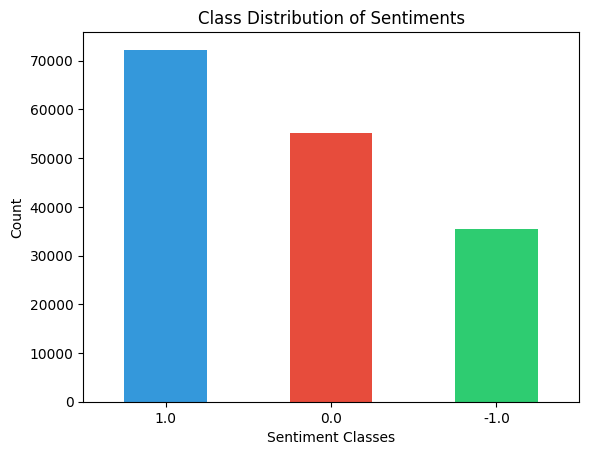

In [15]:
sentiment_counts = df['sentiments'].value_counts()

# Print the distribution
print(sentiment_counts)
sentiment_counts.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], title='Class Distribution of Sentiments')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [16]:
df['Comment']=df['Comment'].str.lstrip()

In [61]:
df.head()

,Comment,sentiments
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [17]:
def count_words(text):
    return len(text.split(" "))
df['word_count'] = df['Comment'].apply(count_words)

df.tail()


,Comment,sentiments,word_count
162975,why these 456 crores paid neerav modi not reco...,-1.0,19
162976,dear rss terrorist payal gawar what about modi...,-1.0,36
162977,did you cover her interaction forum where she ...,0.0,10
162978,there big project came into india modi dream p...,0.0,13
162979,have you ever listen about like gurukul where ...,1.0,35


In [18]:
df['word_count'].agg(['min','max','mean'])
df.head()


,Comment,sentiments,word_count
0,when modi promised “minimum government maximum...,-1.0,33
1,talk all the nonsense and continue all the dra...,0.0,14
2,what did just say vote for modi welcome bjp t...,1.0,23
3,asking his supporters prefix chowkidar their n...,1.0,34
4,answer who among these the most powerful world...,1.0,15


In [19]:
df['Comment'] = df['Comment'].str.lower()


In [20]:
def removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    return text

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [21]:
def preprocess_text(text):
    text = removing_numbers(text)
    text = removing_urls(text)
    text = removing_punctuations(text)
    
    return text

df['Comment'] = df['Comment'].apply(preprocess_text)

In [22]:
# remove stopwords from comments

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

df['Comment'] = df['Comment'].apply(remove_stopwords)

In [23]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split(" ")]
    return " ".join(text)

df['Comment'] = df['Comment'].apply(lemmatize_text)

In [25]:
df.to_csv("preprocessed_data.csv", index=False)


In [26]:
df = pd.read_csv("preprocessed_data.csv")


In [46]:
df['sentiments'] = df['sentiments'].astype(int)


In [47]:
df.head()

,Comment,sentiments,word_count
0,modi promised “ minimum government maximum gov...,-1,33
1,talk nonsense continue drama vote modi,0,14
2,say vote modi welcome bjp told rahul main camp...,1,23
3,asking supporter prefix chowkidar name modi gr...,1,34
4,answer among powerful world leader today trump...,1,15


In [48]:
df.to_pickle("preprocessed_data.pkl")


In [49]:
X = df.drop(columns='sentiments')
y = df['sentiments']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True,stratify=y)


In [51]:
print("The shape of X_train is",X_train.shape)
print("The shape of X_train is",X_test.shape)

print("The shape of X_test is",X_test.shape)

The shape of X_train is (130375, 2)
The shape of X_train is (32594, 2)
The shape of X_test is (32594, 2)


Text(0.5, 1.0, 'Test Data')

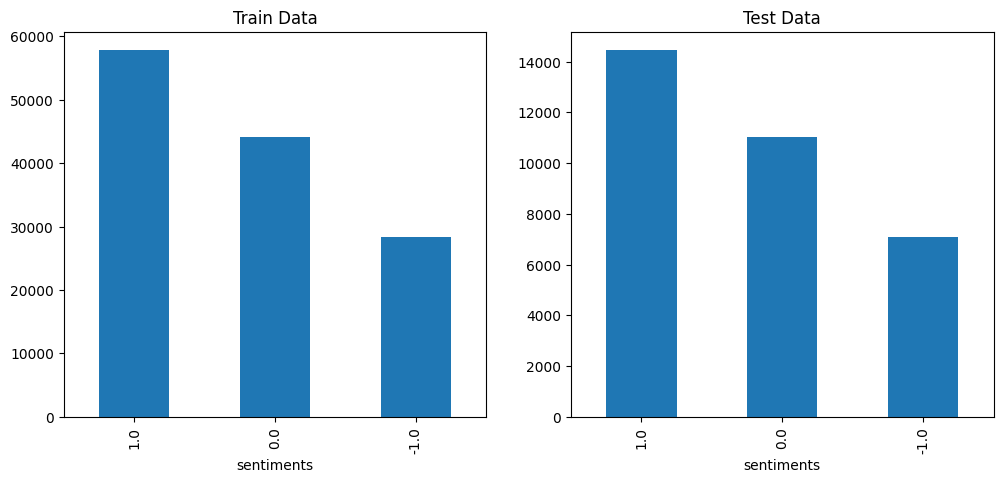

In [81]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar')
plt.title("Train Data")

plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar')
plt.title("Test Data")

In [52]:
# transform the output variable
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [35]:
y_train

array([1, 0, 2, ..., 2, 0, 2], dtype=int64)

In [54]:
# form the preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('encode',CountVectorizer(decode_error='ignore'),'Comment'),
    ('scale',StandardScaler(),['word_count'])
],n_jobs=-1)

preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('encode',
                                 CountVectorizer(decode_error='ignore'),
                                 'Comment'),
                                ('scale', StandardScaler(), ['word_count'])])

In [55]:
preprocessor.fit_transform(X_train.sample(20)).toarray()


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.98758338],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.40655814],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.40655814],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.10973149],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08978031],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.08733927]])

In [64]:
# form the model building pipeline

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',LogisticRegression())
])

In [81]:
preprocessors = [CountVectorizer(decode_error='ignore'),TfidfVectorizer(decode_error='ignore')]

# list of classifiers
classifiers = [LogisticRegression(max_iter=1000),
               SVC(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
             ]

In [82]:
# params grid

params_grid = {
    "preprocessor__encode": preprocessors,
    "clf": classifiers
}

search = GridSearchCV(model_pipe,params_grid,
                      scoring='accuracy',n_jobs=-1,
                     cv=3,verbose=3)

search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'Comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(max_iter=1000), SVC(),
                                 RandomForestClassifier(),
                                 GradientBoostingClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [59]:
print(type(X_train))  # Should be a DataFrame or 2D array
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(130375, 2)


In [61]:
import os

# Check the number of available CPU cores
cpu_cores = os.cpu_count()
print(f"Available CPU cores: {cpu_cores}")


Available CPU cores: 20


In [93]:
# Reduce the training data size to 3%
sample_indices = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * 0.50), replace=False)  # Sample indices
X_train_small = X_train.iloc[sample_indices]  # Use .iloc for proper indexing
y_train_small = y_train[sample_indices]  # Use numpy indexing with sampled indices

# Check the new size
print(X_train_small.shape)
print(y_train_small.shape)

(65187, 2)
(65187,)


In [94]:
search.fit(X_train_small, y_train_small)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'Comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(max_iter=1000), SVC(),
                                 RandomForestClassifier(),
                                 GradientBoostingClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [95]:
search.best_score_


0.8657554420359888

In [96]:
search.best_params_


{'clf': LogisticRegression(max_iter=1000),
 'preprocessor__encode': CountVectorizer(decode_error='ignore')}

In [97]:
pd.DataFrame(search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_preprocessor__encode,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,21.823578,0.269933,0.631642,0.032301,LogisticRegression(max_iter=1000),CountVectorizer(decode_error='ignore'),"{'clf': LogisticRegression(max_iter=1000), 'pr...",0.865387,0.860049,0.871830,0.865755,0.004817,1
1,19.055392,1.155795,0.720890,0.044527,LogisticRegression(max_iter=1000),TfidfVectorizer(decode_error='ignore'),"{'clf': LogisticRegression(max_iter=1000), 'pr...",0.837406,0.834415,0.846242,0.839354,0.005021,2
2,1389.001992,47.861396,87.398783,2.381681,SVC(),CountVectorizer(decode_error='ignore'),"{'clf': SVC(), 'preprocessor__encode': CountVe...",0.816559,0.811312,0.821897,0.816589,0.004321,3
3,1171.255059,2.987636,110.009823,0.584563,SVC(),TfidfVectorizer(decode_error='ignore'),"{'clf': SVC(), 'preprocessor__encode': TfidfVe...",0.810346,0.805605,0.817341,0.811097,0.004820,5
4,785.122625,1.931883,3.190648,0.264866,RandomForestClassifier(),CountVectorizer(decode_error='ignore'),"{'clf': RandomForestClassifier(), 'preprocesso...",0.816052,0.807308,0.821989,0.815117,0.006030,4
5,701.071117,1.285086,2.782309,0.079235,RandomForestClassifier(),TfidfVectorizer(decode_error='ignore'),"{'clf': RandomForestClassifier(), 'preprocesso...",0.794836,0.791983,0.802154,0.796324,0.004283,6
6,159.717189,4.136478,0.630405,0.052442,GradientBoostingClassifier(),CountVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.701045,0.701321,0.714023,0.705463,0.006054,8
7,359.831032,0.698580,0.511967,0.013421,GradientBoostingClassifier(),TfidfVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.703116,0.701275,0.714391,0.706260,0.005798,7


In [121]:
y_pred_train = search.best_estimator_.predict(X_train_small)


In [125]:
from sklearn.metrics import accuracy_score

# Assuming you've already made predictions on the training data (or test data) using your model

# Calculate and print the accuracy score
print("The train accuracy score is: ",accuracy_score(y_train_small,y_pred_train))

The train accuracy score is:  0.9604829183732952


Confusion Matrix:
[[13237   464   533]
 [  176 21738   203]
 [  423   777 27636]]


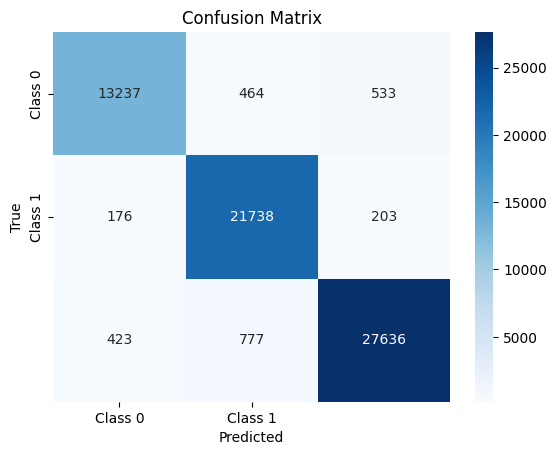

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions

# Compute the confusion matrix
cm = confusion_matrix(y_train_small, y_pred_train)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can plot the confusion matrix using seaborn for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_train_small, y_pred_train, average=None)
recall = recall_score(y_train_small, y_pred_train, average=None)
f1 = f1_score(y_train_small, y_pred_train, average=None)

print("Precision for each class: ", precision)
print("Recall for each class: ", recall)
print("F1-score for each class: ", f1)

Precision for each class:  [0.95670714 0.94599417 0.97405893]
Recall for each class:  [0.92995644 0.98286386 0.95838535]
F1-score for each class:  [0.94314214 0.96407664 0.96615858]


In [128]:
results = dict(search.cv_results_)


In [102]:
pd.DataFrame(results).to_csv("results.csv",index=False)

In [104]:
import pickle as pkl

with open("results.pkl",'wb') as res:
    pkl.dump(results,res)

In [105]:
best_model = search.best_estimator_
output_dir = 'models'
os.makedirs(output_dir,exist_ok=True)

joblib.dump(best_model,os.path.join(output_dir,"best_model.joblib"))


['models\\best_model.joblib']

In [106]:
y_pred_test = best_model.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, f1_score


In [131]:
# get the accuracy score

print("The train accuracy score is: ",accuracy_score(y_train_small,y_pred_train))
print("The train f1 score is: ",f1_score(y_train_small,y_pred_train,average='macro'))

print("#"*50)

print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("The test f1 score is: ",f1_score(y_test,y_pred_test,average='macro'))

The train accuracy score is:  0.9604829183732952
The train f1 score is:  0.9577924534556249
##################################################
The test accuracy score is:  0.8764803338037676
The test f1 score is:  0.8643594838564562


In [132]:
score = cross_val_score(best_model,X_train_small,y_train_small,
                        cv=5,scoring='accuracy',
                        n_jobs=-1,verbose=2)
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.3s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.5s finished


array([0.87037889, 0.87267986, 0.86384905, 0.87220986, 0.87773261])